In [1]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

# data load

In [2]:
data = pd.read_csv('./data/colorspace_tras.csv')
data.head()

,Top_RGB_R,Top_RGB_G,Top_RGB_B,Bot_RGB_R,Bot_RGB_G,Bot_RGB_B,Top_YUV_Y,Top_YUV_U,Top_YUV_V,Bot_YUV_Y,...,Bot_LAB_L,Bot_LAB_A,Bot_LAB_B,Top_HSL_H,Top_HSL_S,Top_HSL_L,Bot_HSL_H,Bot_HSL_S,Bot_HSL_L,Thickness
0,11.5760,10.8832,8.1364,30.2140,37.7740,50.4468,10.8832,126.6404,128.6928,37.0204,...,37.9392,128.6176,118.6128,22.0552,10.0796,48.2524,108.7624,40.5660,64.2544,48.266667
1,12.4712,12.6248,11.2136,25.9992,34.8912,43.0424,12.5096,127.3584,127.9616,33.1272,...,33.6496,126.7188,121.4292,23.5584,11.9808,19.2812,104.2764,34.6176,63.2720,47.966667
2,12.7704,12.7176,9.9168,31.3148,35.7876,41.8260,12.5384,126.7120,128.2320,35.1444,...,35.5236,127.6692,123.3704,29.7648,11.5876,36.0004,107.4464,36.5932,36.9364,48.166667
3,11.2308,11.4564,8.8540,24.8812,32.4324,39.4952,11.1748,126.9128,128.0560,31.0332,...,30.6900,126.8772,122.1940,26.6792,10.3208,38.6628,104.4104,32.3344,58.2892,48.600000
4,5.4696,3.2120,1.4352,26.0116,32.5420,38.0564,3.6852,126.9400,129.7764,31.2852,...,30.9328,126.7972,123.3564,30.1924,3.4992,183.6056,104.3064,32.1788,48.6532,59.533333


# data analysis

각 피처의 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 25번째 백분위수(25%), 중앙값(50% 또는 median), 75번째 백분위수(75%), 최댓값(max)

In [3]:
data.describe()

,Top_RGB_R,Top_RGB_G,Top_RGB_B,Bot_RGB_R,Bot_RGB_G,Bot_RGB_B,Top_YUV_Y,Top_YUV_U,Top_YUV_V,Bot_YUV_Y,...,Bot_LAB_L,Bot_LAB_A,Bot_LAB_B,Top_HSL_H,Top_HSL_S,Top_HSL_L,Bot_HSL_H,Bot_HSL_S,Bot_HSL_L,Thickness
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,4.601877,11.087994,20.808195,26.462539,33.939666,41.037861,10.241452,133.098372,123.035600,32.521940,...,32.633461,126.913802,122.205206,93.122687,12.808120,203.430831,104.725024,33.851027,55.880233,84.826509
std,6.824861,10.356774,14.977051,3.082022,2.130973,3.115974,8.624496,5.263032,5.722061,2.118323,...,2.623589,1.154711,1.669383,34.740570,8.332801,55.747801,3.273863,2.363805,15.463202,20.421769
min,0.312400,0.440400,0.430400,18.461200,25.324400,28.894800,1.150800,116.742800,110.581200,23.889200,...,21.631600,123.672000,117.938800,7.559200,1.617600,12.677200,97.019200,24.275600,19.710000,47.966667
25%,0.940200,2.061800,8.273800,24.560200,32.582800,39.325200,2.837600,128.660600,117.604000,31.257000,...,30.873200,126.149000,120.993400,98.811600,5.258400,188.764200,102.524800,32.309400,44.592000,72.966667
50%,1.508800,8.000400,18.030000,26.238000,34.178000,41.166800,7.782400,133.894400,124.542400,32.530000,...,32.714400,126.949200,121.994400,106.993600,11.587600,227.466000,104.512000,33.931600,57.197600,82.166667
75%,4.974400,18.687000,34.533200,28.349000,35.339400,43.124000,15.941200,136.921000,127.848000,34.018600,...,34.413000,127.732600,123.447800,114.199400,18.637000,237.896600,106.982400,35.270000,66.909200,96.600000
max,30.558000,34.105200,46.729600,35.340400,39.848400,50.446800,31.222400,141.223600,132.742000,37.020400,...,38.323200,129.134400,125.613600,137.647200,31.071600,245.719600,112.849600,40.566000,101.343600,161.100000


각 피처와 타겟 변수인 'Thickness'와의 관계를 살펴보기 위해 상관 계수를 계산합니다.

상관 계수는 -1에서 1까지의 값을 가지며, -1은 완벽한 음의 선형 관계, 0은 선형 관계 없음, 1은 완벽한 양의 선형 관계를 나타냅니다.

하지만 이 방법은 두 변수 간의 선형 관계만을 고려하므로, 비선형 관계를 갖는 피처는 간과될 수 있습니다.

In [4]:
correlation = data.corr()['Thickness'].sort_values(ascending=False)
correlation

Thickness    1.000000
Top_LAB_L    0.808009
Top_YUV_Y    0.803541
Top_RGB_G    0.794907
Top_HSL_S    0.757919
Top_HSV_V    0.736433
Top_RGB_R    0.560428
Top_RGB_B    0.555143
Bot_HSV_H    0.146134
Bot_HSL_H    0.145530
Bot_LAB_A    0.140180
Top_YUV_U    0.133090
Top_HSL_H    0.126389
Top_HSV_H    0.126193
Bot_YUV_U    0.116925
Bot_HSL_L    0.047943
Bot_HSV_V    0.045730
Bot_RGB_B    0.045685
Bot_HSV_S    0.043405
Bot_YUV_V    0.023340
Top_HSV_S    0.018474
Bot_HSL_S    0.014537
Bot_RGB_R   -0.022754
Top_HSL_L   -0.025795
Bot_YUV_Y   -0.052051
Bot_LAB_L   -0.065219
Bot_RGB_G   -0.084857
Bot_LAB_B   -0.128199
Top_LAB_B   -0.162757
Top_YUV_V   -0.471968
Top_LAB_A   -0.473936
Name: Thickness, dtype: float64

In [5]:
correlation_df = pd.DataFrame(data.corr()['Thickness']).reset_index()
correlation_df.columns = ['feature', 'correlation']
selected_features = correlation_df.loc[(correlation_df['correlation'].abs() > 0.3), 'feature'].values

# 상관계수가 0.3보다 낮은 것은 먼저 제외
selected_features = [feature for feature in selected_features if feature != 'Thickness']

X = data[selected_features]
y = data['Thickness']

# 랜덤포레스트로 중요한 데이터 피쳐를 선별합니다.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'feature': selected_features, 'importance': feature_importances})

importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df


,feature,importance
8,Top_HSL_S,0.226768
6,Top_LAB_L,0.184577
0,Top_RGB_R,0.122382
5,Top_HSV_V,0.104310
4,Top_YUV_V,0.101255
1,Top_RGB_G,0.092069
3,Top_YUV_Y,0.081225
2,Top_RGB_B,0.078609
7,Top_LAB_A,0.008804


In [6]:
# 상관 계수 계산
corr_matrix = X.corrwith(y)

# 상관 계수가 0.3 이상인 피처만 선택
correlated_features = corr_matrix[corr_matrix.abs() > 0.3].index
X_filtered = X[correlated_features]

# 확인
X_filtered.head()

,Top_RGB_R,Top_RGB_G,Top_RGB_B,Top_YUV_Y,Top_YUV_V,Top_HSV_V,Top_LAB_L,Top_LAB_A,Top_HSL_S
0,11.5760,10.8832,8.1364,10.8832,128.6928,11.5760,7.9380,127.7256,10.0796
1,12.4712,12.6248,11.2136,12.5096,127.9616,12.7416,9.1360,127.8464,11.9808
2,12.7704,12.7176,9.9168,12.5384,128.2320,12.9592,9.1536,127.7216,11.5876
3,11.2308,11.4564,8.8540,11.1748,128.0560,11.6148,8.1944,127.6992,10.3208
4,5.4696,3.2120,1.4352,3.6852,129.7764,5.5860,2.1696,128.2872,3.4992


Recursive Feature Elimination (RFE)를 적용

모델을 반복적으로 학습하고 가장 약한 피처를 제거하는 방법

In [7]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Linear Regression model
model = LinearRegression()

# RFE
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_filtered, y)

# Selected features
selected_features = X_filtered.columns[rfe.support_]

selected_features


Index(['Top_RGB_R', 'Top_RGB_G', 'Top_YUV_Y', 'Top_YUV_V', 'Top_LAB_L'], dtype='object')

SelectFromModel을 사용하여 피처를 선택

모델의 계수나 피처 중요도를 기반으로 피처를 선택

 Lasso 모델 L1 규제를 사용하여 일부 피처의 계수를 0으로 만들어 피처 선택에 사용

In [8]:
# SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Lasso model
model = Lasso(alpha=0.1)

# SelectFromModel
sfm = SelectFromModel(estimator=model)
X_sfm = sfm.fit_transform(X_filtered, y)

# Selected features
selected_features = X_filtered.columns[sfm.get_support()]

selected_features

/home/hakki/anaconda3/envs/torch2.0/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.954e+03, tolerance: 5.255e+00
  model = cd_fast.enet_coordinate_descent(


Index(['Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_YUV_V', 'Top_HSV_V',
       'Top_LAB_L', 'Top_LAB_A', 'Top_HSL_S'],
      dtype='object')

# adaboost로 테스트

In [9]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_YUV_V', 'Top_HSV_V', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.5},
 5.4829482463387595)

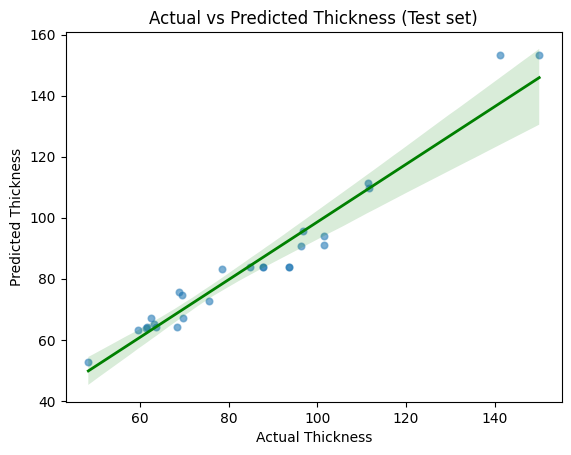

In [10]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [11]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_YUV_V', 'Top_HSV_V', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

/home/hakki/anaconda3/envs/torch2.0/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


({'n_estimators': 300, 'loss': 'square', 'learning_rate': 1.0},
 5.722764396794096)

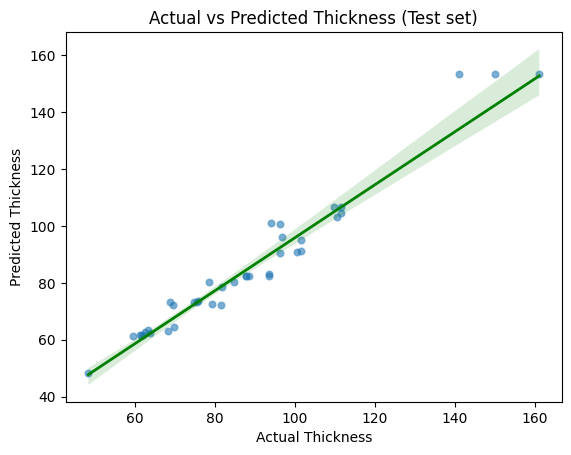

In [12]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [13]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B', 'Top_YUV_U', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과
best_params, rmse


({'n_estimators': 400, 'loss': 'linear', 'learning_rate': 1.0},
 6.736875597411016)

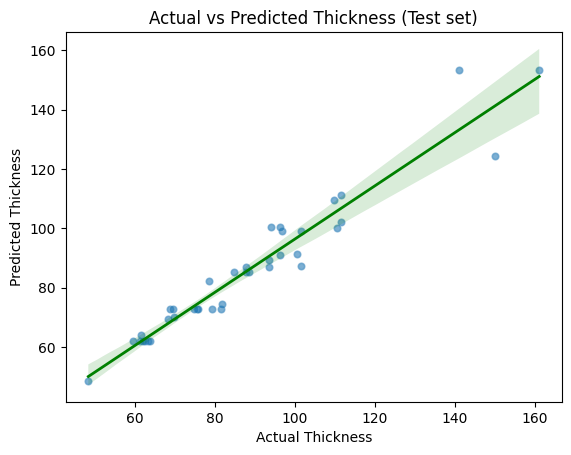

In [14]:
# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [16]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과
best_params, rmse


({'n_estimators': 50, 'loss': 'square', 'learning_rate': 1.0},
 7.2061755942763845)

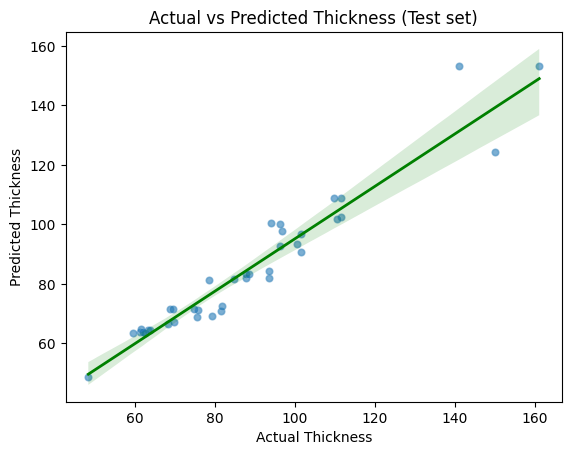

In [17]:
# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [18]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'n_estimators': 200, 'loss': 'linear', 'learning_rate': 0.5},
 5.567646419472455)

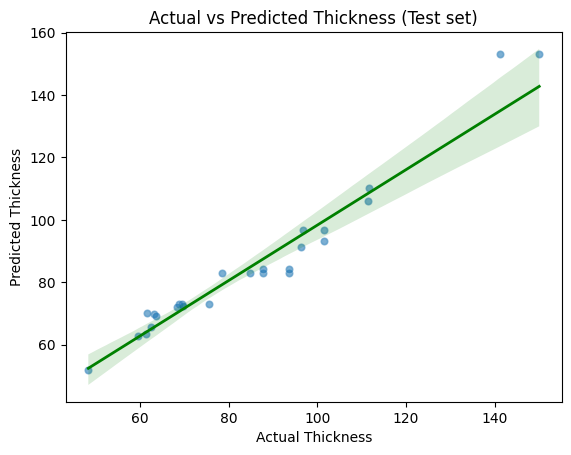

In [19]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [20]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B','Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.5},
 5.607971678751576)

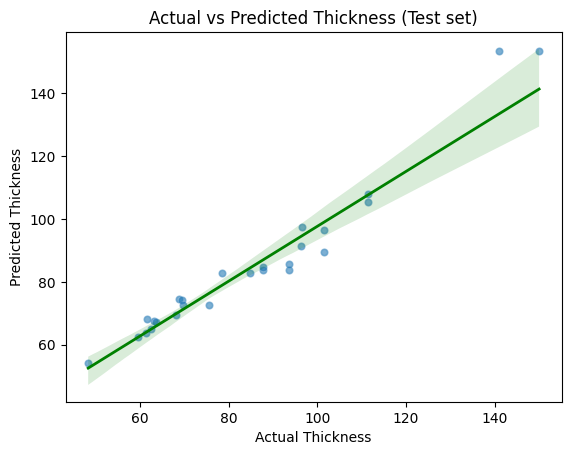

In [21]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [6]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_HSL_S','Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost 회귀 모델 설정
ada_reg = AdaBoostRegressor()

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(ada_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'n_estimators': 50, 'loss': 'square', 'learning_rate': 1.0},
 6.343896827568842)

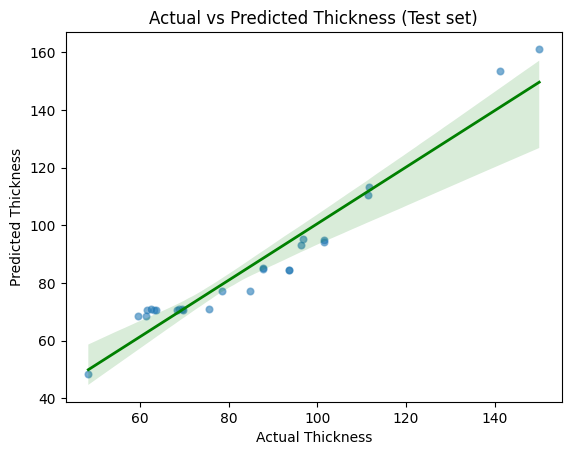

In [7]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()